In [79]:
from astropy.table import Table
import astropy.constants as const

import numpy as np

import matplotlib.pyplot as plt

In [16]:
master_table = Table.read('master_file_vflag_6.txt', format='ascii.ecsv')

In [64]:
###############################################################################
# Remove bad galaxies
#------------------------------------------------------------------------------
bad_boolean = np.logical_or(master_table['curve_used'] == 'non', master_table['curve_used'] == 'none')

good_galaxies = master_table[np.logical_not(bad_boolean)]
###############################################################################


###############################################################################
good_galaxies['v_max'] = 0.
good_galaxies['sigma_v_max'] = 0.

for i in range(len(good_galaxies)):
    curve_used = good_galaxies['curve_used'][i]
    
    good_galaxies['v_max'][i] = good_galaxies[curve_used + '_v_max'][i]
    good_galaxies['sigma_v_max'][i] = good_galaxies[curve_used + '_v_max_sigma'][i]
###############################################################################

## Plot error v. ratio

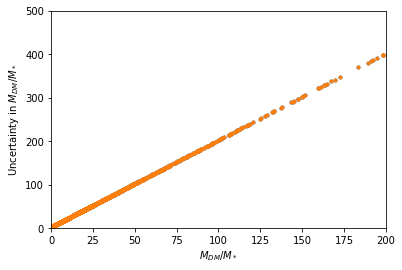

In [35]:
plt.figure()
plt.plot(master_table['Mdark_Mstar_ratio'], master_table['Mdark_Mstar_ratio_error'], '.')
plt.plot(good_galaxies['Mdark_Mstar_ratio'], good_galaxies['Mdark_Mstar_ratio_error'], '.')
plt.xlabel('$M_{DM}/M_*$')
plt.ylabel('Uncertainty in $M_{DM}/M_*$')
plt.xlim(0,200)
plt.ylim(0,500)
plt.show()

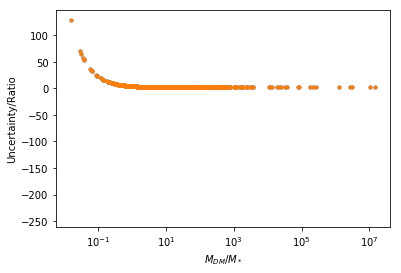

In [19]:
plt.figure()
plt.semilogx(master_table['Mdark_Mstar_ratio'], 
             master_table['Mdark_Mstar_ratio_error']/master_table['Mdark_Mstar_ratio'], '.')
plt.semilogx(good_galaxies['Mdark_Mstar_ratio'],
             good_galaxies['Mdark_Mstar_ratio_error']/good_galaxies['Mdark_Mstar_ratio'], '.')
plt.xlabel('$M_{DM}/M_*$')
plt.ylabel('Uncertainty/Ratio')
plt.show()

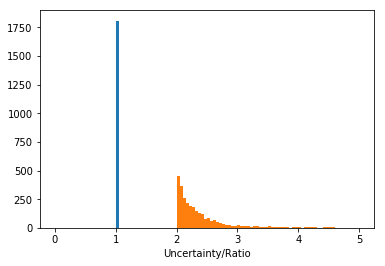

In [21]:
plt.figure()
plt.hist(master_table['Mdark_Mstar_ratio_error']/master_table['Mdark_Mstar_ratio'], bins=100, range=(0,5))
plt.hist(good_galaxies['Mdark_Mstar_ratio_error']/good_galaxies['Mdark_Mstar_ratio'], bins=100, range=(0,5))
plt.xlabel('Uncertainty/Ratio')
plt.show()

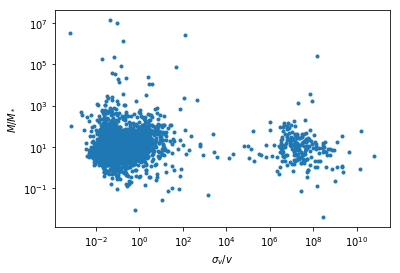

In [75]:
plt.figure()
plt.loglog(good_galaxies['sigma_v_max']/good_galaxies['v_max'], good_galaxies['Mtot']/good_galaxies['Mstar'], '.')
plt.xlabel('$\sigma_v/v$')
plt.ylabel('$M/M_*$')
plt.show()

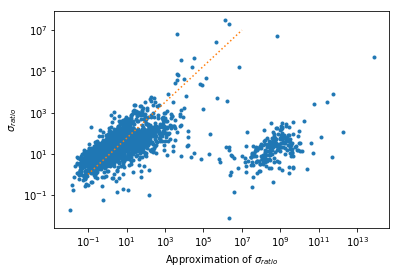

In [92]:
ratio_error = (good_galaxies['Mtot']/good_galaxies['Mstar'])*np.sqrt((2*good_galaxies['sigma_v_max']/good_galaxies['v_max'])**2 
                                                                     + (const.G.uncertainty*const.G.unit/const.G)**2)

plt.figure()
plt.loglog(ratio_error, good_galaxies['Mdark_Mstar_ratio_error'], '.')
plt.loglog(np.logspace(-1,7), np.logspace(0,7), ':')
plt.xlabel('Approximation of $\sigma_{ratio}$')
plt.ylabel('$\sigma_{ratio}$')
plt.show()

In [85]:
const.G.uncertainty*const.G.unit/const.G

<Quantity 4.64483494e-05>

In [89]:
boolean = np.logical_and(good_galaxies['MaNGA_plate'] == 8317, good_galaxies['MaNGA_fiberID'] == 1902)

good_galaxies[boolean].pprint()

MaNGA_plate MaNGA_fiberID NSA_plate ...       v_max          sigma_v_max   
                                    ...                                    
----------- ------------- --------- ... ------------------ ----------------
       8317          1902      1458 ... 0.5054556742253032 760.202410447634
